<a href="https://colab.research.google.com/github/leejineun/ai-class/blob/main/8_brain_tumor-Full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cafedobby","key":"d889f711ccfd235770071e2121d7a7bc"}'}

In [2]:
!ls

kaggle.json  sample_data


In [3]:
!mkdir -p ~/.kaggle

In [4]:
!cp kaggle.json ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

 33% 5.00M/15.1M [00:00<00:00, 11.8MB/s]
100% 15.1M/15.1M [00:00<00:00, 30.8MB/s]


In [6]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  sample_data


In [7]:
!unzip brain-mri-images-for-brain-tumor-detection.zip

Archive:  brain-mri-images-for-brain-tumor-detection.zip
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumor_datase

In [41]:
import numpy as np
from tqdm import tqdm
import cv2
import os 
import shutil
import itertools
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Dense, Flatten, Dropout
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [9]:
import imutils

In [10]:
!ls

brain-mri-images-for-brain-tumor-detection.zip	kaggle.json  sample_data
brain_tumor_dataset				no	     yes


In [11]:
os.listdir('./brain_tumor_dataset')

['no', 'yes']

In [12]:
os.listdir('./brain_tumor_dataset/no')

['40 no.jpg',
 '27 no.jpg',
 'No22.jpg',
 'no 9.png',
 'No20.jpg',
 '37 no.jpg',
 'no 89.jpg',
 '19 no.jpg',
 'N2.JPG',
 'no 99.jpg',
 '25 no.jpg',
 '47 no.jpg',
 '12 no.jpg',
 '10 no.jpg',
 '18 no.jpg',
 '7 no.jpg',
 'no 91.jpeg',
 '17 no.jpg',
 'No12.jpg',
 '45 no.jpg',
 '3 no.jpg',
 '28 no.jpg',
 'no 2.jpg',
 '26 no.jpg',
 '49 no.jpg',
 'N5.jpg',
 'no.jpg',
 'no 98.jpg',
 '30 no.jpg',
 '2 no.jpeg',
 'N15.jpg',
 'No14.jpg',
 'No18.jpg',
 '23 no.jpg',
 'No21.jpg',
 'no 8.jpg',
 'no 1.jpg',
 'N19.JPG',
 'N6.jpg',
 '21 no.jpg',
 'no 97.jpg',
 'No11.jpg',
 '36 no.jpg',
 'no 90.jpg',
 '22 no.jpg',
 'no 94.jpg',
 '50 no.jpg',
 'No17.jpg',
 '11 no.jpg',
 'no 6.jpg',
 '42 no.jpg',
 '6 no.jpg',
 'N17.jpg',
 'N11.jpg',
 'no 100.jpg',
 'No13.jpg',
 '8 no.jpg',
 'No16.jpg',
 '48 no.jpeg',
 'N20.JPG',
 'no 96.jpg',
 'no 5.jpeg',
 '46 no.jpg',
 '15 no.jpg',
 'N26.JPG',
 '38 no.jpg',
 'no 923.jpg',
 'N3.jpg',
 '44no.jpg',
 '29 no.jpg',
 '43 no.jpg',
 'no 4.jpg',
 'no 7.jpeg',
 '34 no.jpg',
 '13 no.

In [13]:
os.listdir('./brain_tumor_dataset/yes')

['Y50.JPG',
 'Y79.jpg',
 'Y244.JPG',
 'Y182.JPG',
 'Y8.jpg',
 'Y59.JPG',
 'Y53.jpg',
 'Y147.JPG',
 'Y2.jpg',
 'Y19.JPG',
 'Y111.JPG',
 'Y42.jpg',
 'Y32.jpg',
 'Y89.JPG',
 'Y1.jpg',
 'Y74.jpg',
 'Y164.JPG',
 'Y109.JPG',
 'Y187.jpg',
 'Y108.jpg',
 'Y38.jpg',
 'Y156.JPG',
 'Y71.JPG',
 'Y44.JPG',
 'Y86.JPG',
 'Y3.jpg',
 'Y77.jpg',
 'Y25.jpg',
 'Y169.jpg',
 'Y29.jpg',
 'Y66.JPG',
 'Y24.jpg',
 'Y97.JPG',
 'Y195.JPG',
 'Y58.JPG',
 'Y248.JPG',
 'Y113.JPG',
 'Y99.JPG',
 'Y23.JPG',
 'Y184.JPG',
 'Y154.jpg',
 'Y256.JPG',
 'Y14.jpg',
 'Y153.jpg',
 'Y90.jpg',
 'Y70.jpg',
 'Y194.jpg',
 'Y161.JPG',
 'Y112.JPG',
 'Y101.jpg',
 'Y250.jpg',
 'Y54.jpg',
 'Y251.JPG',
 'Y27.jpg',
 'Y247.JPG',
 'Y162.jpg',
 'Y259.JPG',
 'Y100.JPG',
 'Y40.JPG',
 'Y67.JPG',
 'Y41.jpg',
 'Y75.JPG',
 'Y188.jpg',
 'Y55.jpg',
 'Y65.JPG',
 'Y193.JPG',
 'Y242.JPG',
 'Y186.jpg',
 'Y78.jpg',
 'Y180.jpg',
 'Y155.JPG',
 'Y51.jpg',
 'Y115.JPG',
 'Y26.jpg',
 'Y46.jpg',
 'Y245.jpg',
 'Y35.jpg',
 'Y243.JPG',
 'Y7.jpg',
 'Y257.jpg',
 'Y16.JP

In [14]:
ROOT_DIR = './brain_tumor_dataset'

images = []
labels = []

for folder in os.listdir(ROOT_DIR) : 
    for file in os.listdir(ROOT_DIR + '/' + folder) : # '{}/{}'.format(ROOT_DIR, folder)
        image = cv2.imread('{}/{}/{}'.format(ROOT_DIR, folder, file)) # ./brain_tumor_dataset/no/no1.jpg
        if image is not None : 
            images.append(image)
            labels.append(folder)

In [15]:
print(len(images), len(labels))

253 253


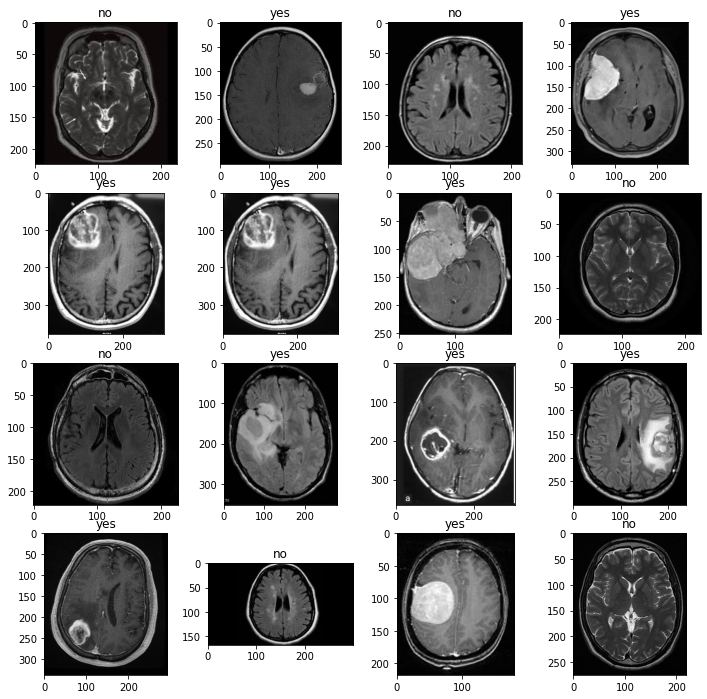

In [16]:
# 시각화 해보기.
# 1. 한 장 띄워보기
# plt.figure(figsize=(4, 4))
# plt.imshow(images[1])
# 2. 여러장 서브플롯 활요해서 띄워보기
# plt.figure(figsize=(12, 12))
# for i in range(16) : 
#     plt.subplot(4, 4, i + 1)
#     plt.imshow(images[i])
# plt.show()
# 3. title 넣기
# plt.figure(figsize=(12, 12))
# for i in range(16) : 
#     plt.subplot(4, 4, i + 1)
#     plt.imshow(images[i])
#     plt.title(labels[i])
# plt.show()
# 4. 사진 순서대로말고 random하게 가져오기
plt.figure(figsize=(12, 12))
for i in range(16) : 
    j = np.random.randint(len(images)) # len 16 index 15
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[j])
    plt.title(labels[j])
plt.show()

# plt.imshow() # plt.subplot() # title # random.
# 다 되신 분은 이미지 리사이징 (224, 224) 

In [17]:
# 이미지 리사이징
# 사이즈 224, 224
# 1. 새로운 리스트 하나 만들어서 리사이징 된 이미지 담기
# resized_images = []
# for image in images : 
#     resized = cv2.resize(image, (224, 224))
#     resized_images.append(resized)
# 2. 기존 이미지에 리사이징 된 이미지 대체해서 넣기
# datagen = ImageDataGenerator()
# datagen.flow_from_directory(target_size=(224,224))
for i, image in enumerate(images) : 
    images[i] = cv2.resize(image, (224, 224))

In [18]:
len(images)

253

In [19]:
images[0].shape

(224, 224, 3)

In [20]:
def crop_imgs(set_name, add_pixels_value=0) : 
    set_new = []

    for img in set_name : 
        gray = cv2.cvtColor(img.astype(np.uint8), cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (5, 5), 0)

        thresh = cv2.threshold(gray, 45, 255, cv2.THRESH_BINARY)[1]
        thresh = cv2.erode(thresh, None, iterations=2)
        thresh = cv2.dilate(thresh, None, iterations=2)

        cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = imutils.grab_contours(cnts)
        c = max(cnts, key=cv2.contourArea)

        extLeft = tuple(c[c[:, :, 0].argmin()][0])
        extRight = tuple(c[c[:, :, 0].argmax()][0])
        extTop = tuple(c[c[:, :, 1].argmin()][0])
        extBot = tuple(c[c[:, :, 1].argmax()][0])

        ADD_PIXELS = add_pixels_value
        new_img = img[extTop[1] - ADD_PIXELS : extBot[1] + ADD_PIXELS, extLeft[0] - ADD_PIXELS : extRight[0] + ADD_PIXELS].copy()
        set_new.append(new_img)
    
    return np.array(set_new)

In [21]:
images = crop_imgs(images)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [22]:
images.shape

(253,)

In [23]:
images[0].shape

(193, 154, 3)

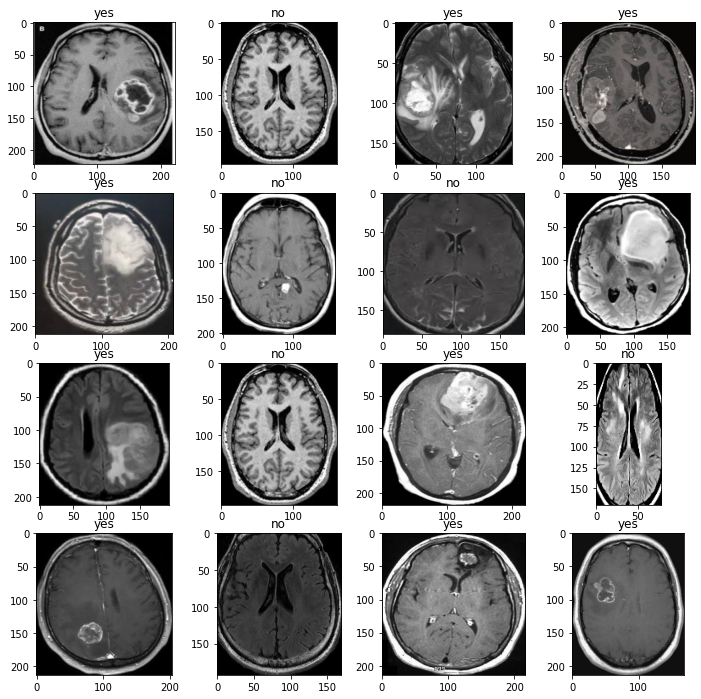

In [24]:
plt.figure(figsize=(12, 12))
for i in range(16) : 
    j = np.random.randint(len(images)) # len 16 index 15
    plt.subplot(4, 4, i + 1)
    plt.imshow(images[j])
    plt.title(labels[j])
plt.show()

In [25]:
for i, image in enumerate(images) : 
    images[i] = cv2.resize(image, (224, 224))

In [26]:
print('전', images.shape)
images = np.concatenate([arr[np.newaxis] for arr in images])
print('후', images.shape)

전 (253,)
후 (253, 224, 224, 3)


In [27]:
# encoding
encoder = LabelEncoder()
labels = encoder.fit_transform(labels)

In [28]:
# train_test_split # test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

In [29]:
print(X_train.shape,X_test.shape, y_train.shape, y_test.shape)

(177, 224, 224, 3) (76, 224, 224, 3) (177,) (76,)


In [30]:
tmp_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05, 
    height_shift_range=0.05, 
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True
)

In [31]:
batch_images = []
x = X_train[0]
x = x.reshape((1,) + x.shape)

i = 0
for batch in tmp_datagen.flow(x, batch_size=1) : 
    i += 1
    batch_images.append(batch)

    if i > 20 : 
        break

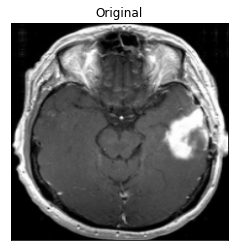

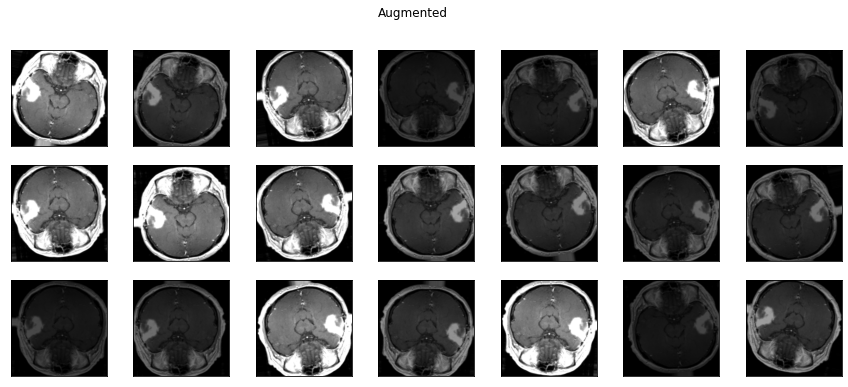

In [71]:
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('Original')
plt.show()

plt.figure(figsize=(15, 6))

for i, img in enumerate(batch_images) : 
    plt.subplot(3, 7, i + 1)
    plt.imshow(np.squeeze(img, axis=0))
    plt.xticks([])
    plt.yticks([])

plt.suptitle('Augmented')
plt.show()

In [33]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.05, 
    height_shift_range=0.05, 
    rescale=1./255,
    shear_range=0.05,
    brightness_range=[0.1, 1.5],
    horizontal_flip=True,
    vertical_flip=True,
    preprocessing_function=preprocess_input
)

In [34]:
test_datagen = ImageDataGenerator(
    rescale=1/255.,
    preprocessing_function=preprocess_input
)

In [35]:
train_datagen.fit(X_train)
test_datagen.fit(X_test)

In [36]:
base_model = VGG16(
    include_top=False, 
    input_shape=(224,224,3)
)

58900480/58889256 [==============================] - 0s 0us/step


In [75]:
# 이진분류 / optimizer= rmsprop / 전이학습 trainable = False basemodel = vgg
model = Sequential()

model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

In [76]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 25088)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 25089     
Total params: 14,739,777
Trainable params: 25,089
Non-trainable params: 14,714,688
_________________________________________________________________


In [77]:
model.layers[0].name

'vgg16'

In [78]:
model_checkpoint = ModelCheckpoint('./best_model.h5', save_best_only=True, monitor='val_loss')

In [79]:
# model_checkpoint = ModelCheckpoint('./best_model.h5', save_best_only=True, monitor='val_loss')
epoch = 30
# es = EarlyStopping(
#     monitor='val_loss',
#     mode='min',
#     patience=15
# )

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[model_checkpoint] 
)

Epoch 1/30
6/6 [==============================] - 3s 456ms/step - loss: 0.7930 - accuracy: 0.6045 - val_loss: 7.5242 - val_accuracy: 0.7237
Epoch 2/30
6/6 [==============================] - 3s 435ms/step - loss: 0.6237 - accuracy: 0.7062 - val_loss: 4.8114 - val_accuracy: 0.6711
Epoch 3/30
6/6 [==============================] - 3s 434ms/step - loss: 0.6111 - accuracy: 0.6836 - val_loss: 3.9242 - val_accuracy: 0.7237
Epoch 4/30
6/6 [==============================] - 3s 430ms/step - loss: 0.5584 - accuracy: 0.7119 - val_loss: 4.0484 - val_accuracy: 0.7500
Epoch 5/30
6/6 [==============================] - 3s 468ms/step - loss: 0.5669 - accuracy: 0.6949 - val_loss: 8.3713 - val_accuracy: 0.6711
Epoch 6/30
6/6 [==============================] - 3s 447ms/step - loss: 0.5555 - accuracy: 0.7119 - val_loss: 7.2607 - val_accuracy: 0.7500
Epoch 7/30
6/6 [==============================] - 3s 432ms/step - loss: 0.4790 - accuracy: 0.7797 - val_loss: 7.8002 - val_accuracy: 0.7368
Epoch 8/30
6/6 [====

In [51]:
from keras.models import load_model
load_model('./best_model.h5')

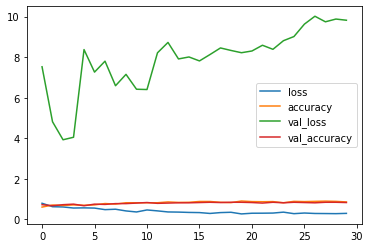

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.plot(history.history['val_accuracy'])
plt.legend(history.history.keys())
plt.show()

In [56]:
files.upload()

Saving inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.zip to inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.zip


In [57]:
!unzip inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.zip

Archive:  inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.zip
  inflating: inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5  


In [58]:
!ls

best_model.h5						      kaggle.json
brain-mri-images-for-brain-tumor-detection.zip		      no
brain_tumor_dataset					      sample_data
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5      yes
inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5.zip


In [63]:
from tensorflow.keras.applications import InceptionV3

In [67]:
inception_weight_path = './inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

inception_base_model = InceptionV3(
    weights=inception_weight_path,
    include_top=False, 
    input_shape=(224,224,3)
)

In [72]:
# 이진분류 / optimizer= rmsprop / 전이학습 trainable = False basemodel = vgg
model = Sequential()

model.add(inception_base_model)
model.add(Flatten())
model.add(Dense(512))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.layers[0].trainable=False

In [73]:
model.compile(
    loss='binary_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 5, 5, 2048)        21802784  
_________________________________________________________________
flatten_3 (Flatten)          (None, 51200)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               26214912  
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 513       
Total params: 48,018,209
Trainable params: 26,215,425
Non-trainable params: 21,802,784
_________________________________________________________________


In [74]:
model_checkpoint = ModelCheckpoint('./inception_best_model.h5', save_best_only=True, monitor='val_loss')
epoch = 30

history = model.fit(
    train_datagen.flow(X_train, y_train, batch_size=32),
    epochs=30,
    validation_data=(X_test, y_test),
    callbacks=[model_checkpoint] 
)

Epoch 1/30
6/6 [==============================] - 7s 626ms/step - loss: 219.4027 - accuracy: 0.5480 - val_loss: 3706.6636 - val_accuracy: 0.6579
Epoch 2/30
6/6 [==============================] - 3s 408ms/step - loss: 75.4605 - accuracy: 0.7006 - val_loss: 2727.5583 - val_accuracy: 0.6579
Epoch 3/30
6/6 [==============================] - 2s 395ms/step - loss: 63.1283 - accuracy: 0.6723 - val_loss: 252.3671 - val_accuracy: 0.5789
Epoch 4/30
6/6 [==============================] - 2s 446ms/step - loss: 12.2977 - accuracy: 0.8588 - val_loss: 1101.8230 - val_accuracy: 0.6579
Epoch 5/30
6/6 [==============================] - 3s 438ms/step - loss: 16.3700 - accuracy: 0.8362 - val_loss: 2299.9214 - val_accuracy: 0.3421
Epoch 6/30
6/6 [==============================] - 3s 403ms/step - loss: 62.1300 - accuracy: 0.6893 - val_loss: 1168.7728 - val_accuracy: 0.6579
Epoch 7/30
6/6 [==============================] - 3s 416ms/step - loss: 24.1480 - accuracy: 0.8192 - val_loss: 1714.4633 - val_accuracy: